<a href="https://colab.research.google.com/github/Sanjayca/Forecasting-Models-ARIMA/blob/main/Simple_Moving_Averges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


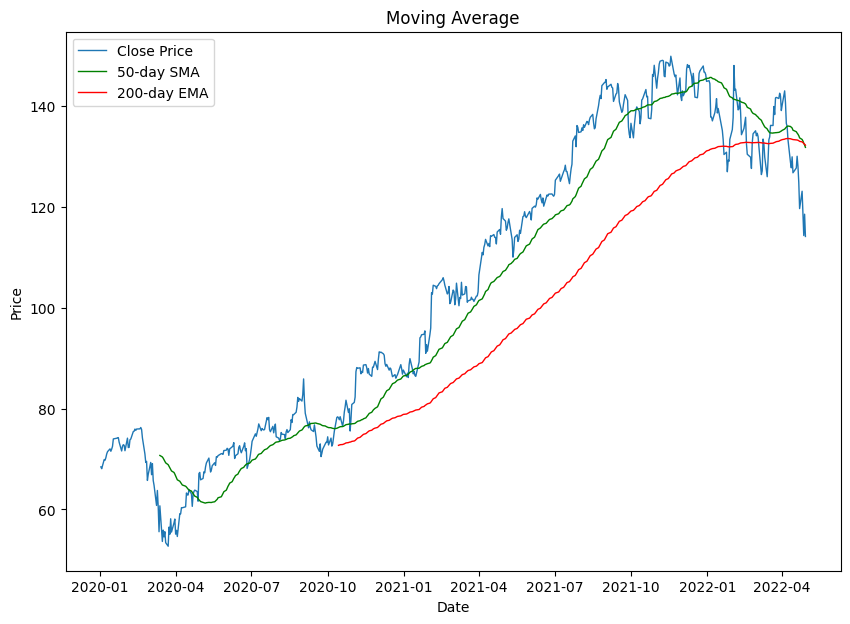

In [ ]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")
close = data['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']


# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


In [ ]:
SMA.head()

Date
2020-03-13    70.69739
2020-03-16    70.40171
2020-03-17    70.15825
2020-03-18    69.85163
2020-03-19    69.56819
Name: SMA, dtype: float64

Auto Regression Integrated Moving Averages model (ARIMA)

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [21]:
raw_data = pd.read_csv("/content/drive/MyDrive/wwwusage.zip", names=['value'], header=0,)
df = raw_data
print(f"Total samples: {len (df)}")
print(df.head())

Total samples: 100
     value
1 1     88
2 2     84
3 3     85
4 4     85
5 5     84


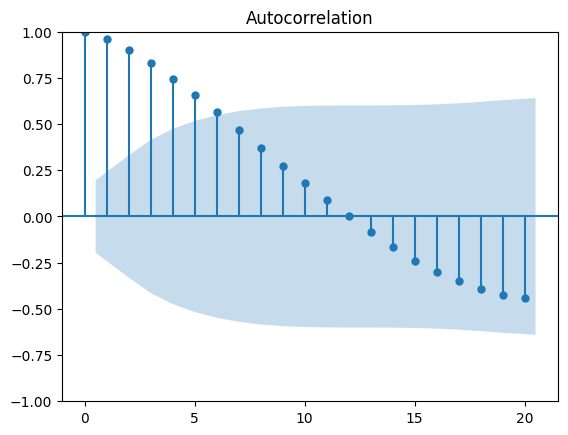

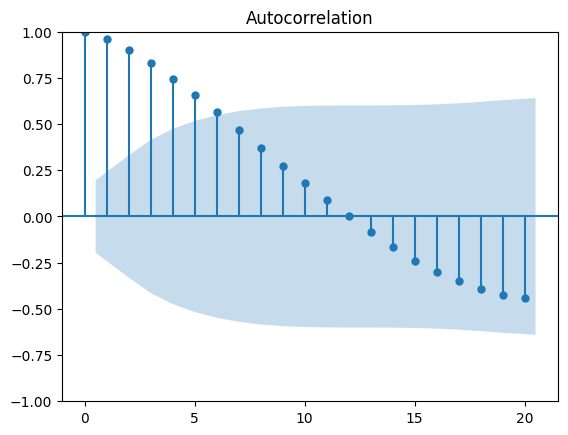

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value)

https://vitalflux.com/autoregressive-ar-models-with-python-examples/

<Axes: >

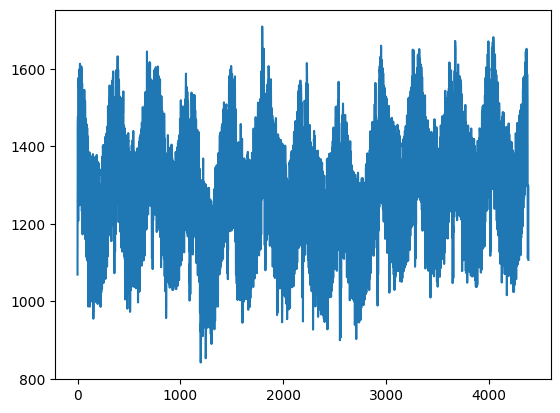

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df['Consumption'].plot()

P-value:  4.7440549018425884e-08


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


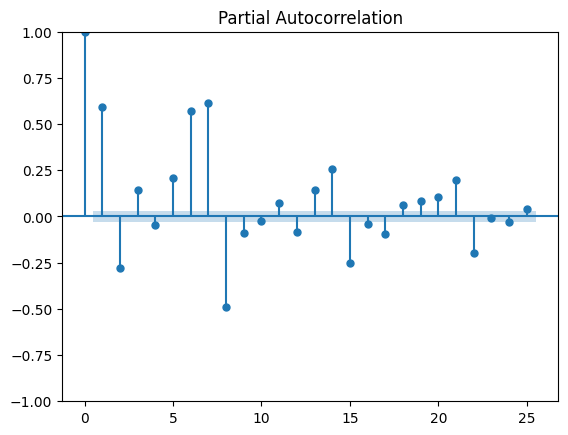

In [27]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

In [28]:
#
# Create training and test data
#
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Fri, 07 Apr 2023   AIC                          48483.625
Time:                        08:05:33   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

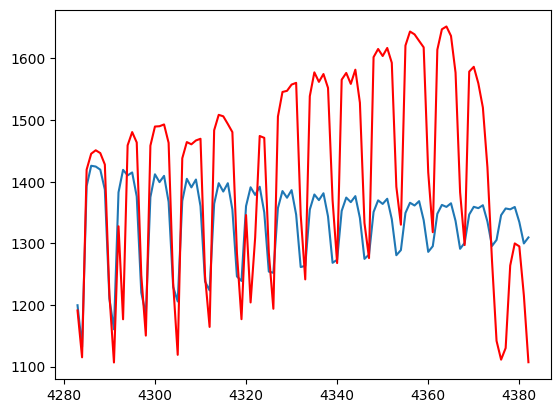

In [29]:
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')